In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,5)
plt.rcParams['figure.dpi'] = 250
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('wine.csv')

In [3]:
data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [4]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
# finding any duplicate values
data.duplicated().sum()

0

<Axes: >

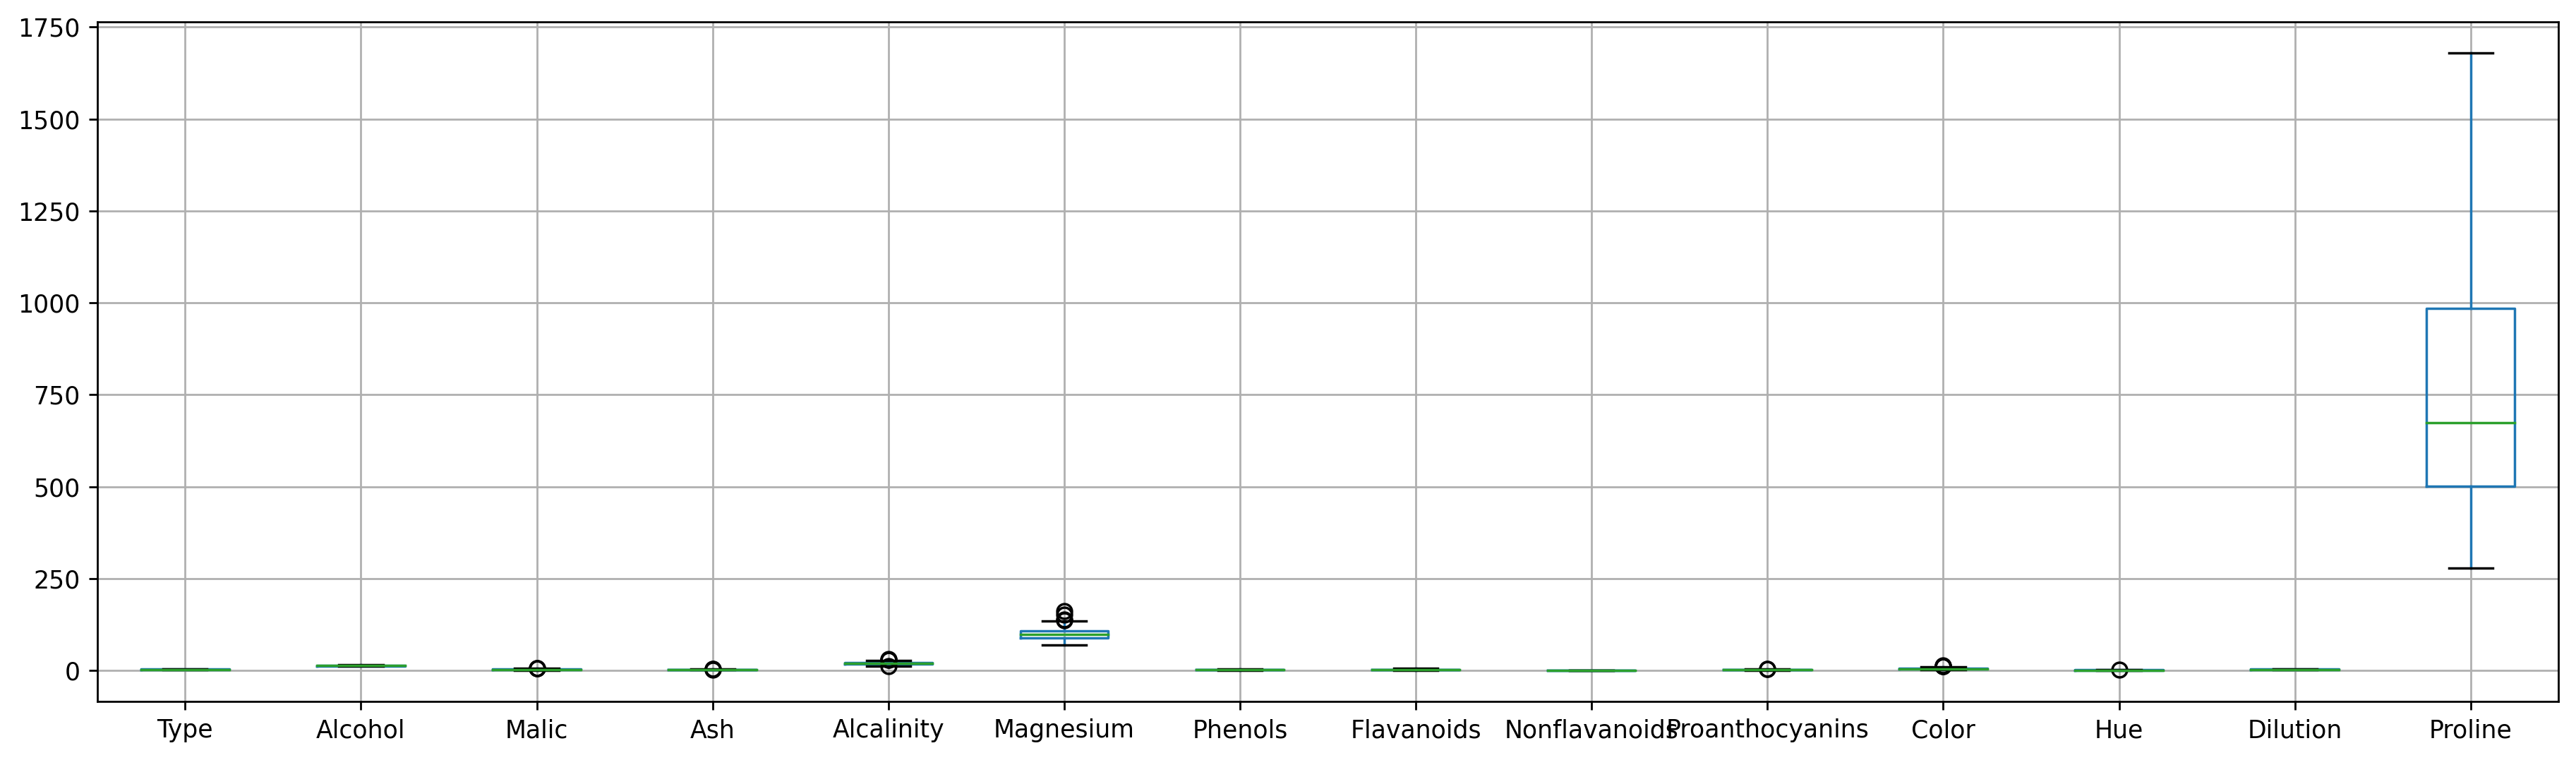

In [7]:
# finding outliers 
data.boxplot()

<Axes: xlabel='Flavanoids'>

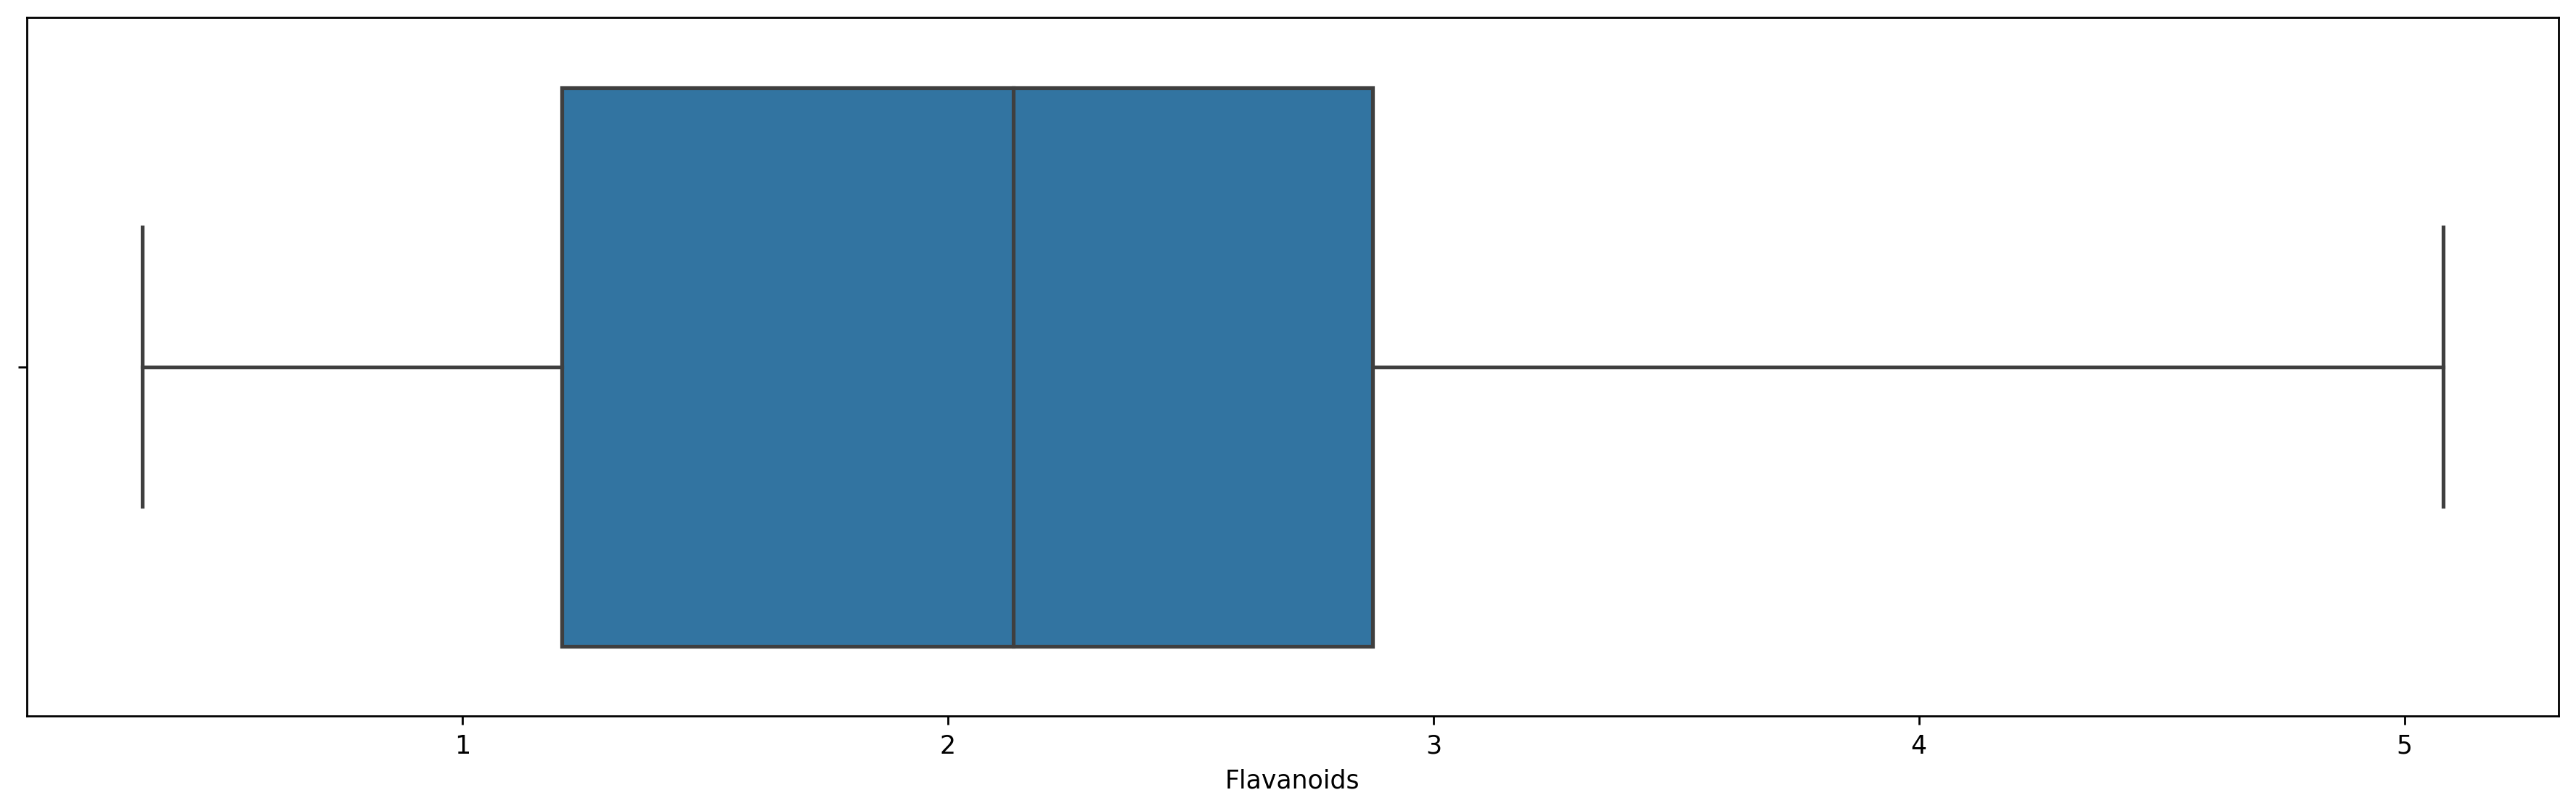

In [8]:
sns.boxplot(x = data['Flavanoids'])

In [9]:
# calculating upper and lower extreme
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3-q1
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme,upper_extreme

In [10]:
# treating outliers
def outlier_treatment(data,colname):
    lower_extreme,upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers for column {colname} are treated !!")

In [11]:
outlier_treatment(data,'Malic')
outlier_treatment(data,'Ash')
outlier_treatment(data,'Alcalinity')
outlier_treatment(data,'Magnesium')
outlier_treatment(data,'Proanthocyanins')
outlier_treatment(data,'Color')
outlier_treatment(data,'Hue')

All the outliers for column Malic are treated !!
All the outliers for column Ash are treated !!
All the outliers for column Alcalinity are treated !!
All the outliers for column Magnesium are treated !!
All the outliers for column Proanthocyanins are treated !!
All the outliers for column Color are treated !!
All the outliers for column Hue are treated !!


<Axes: >

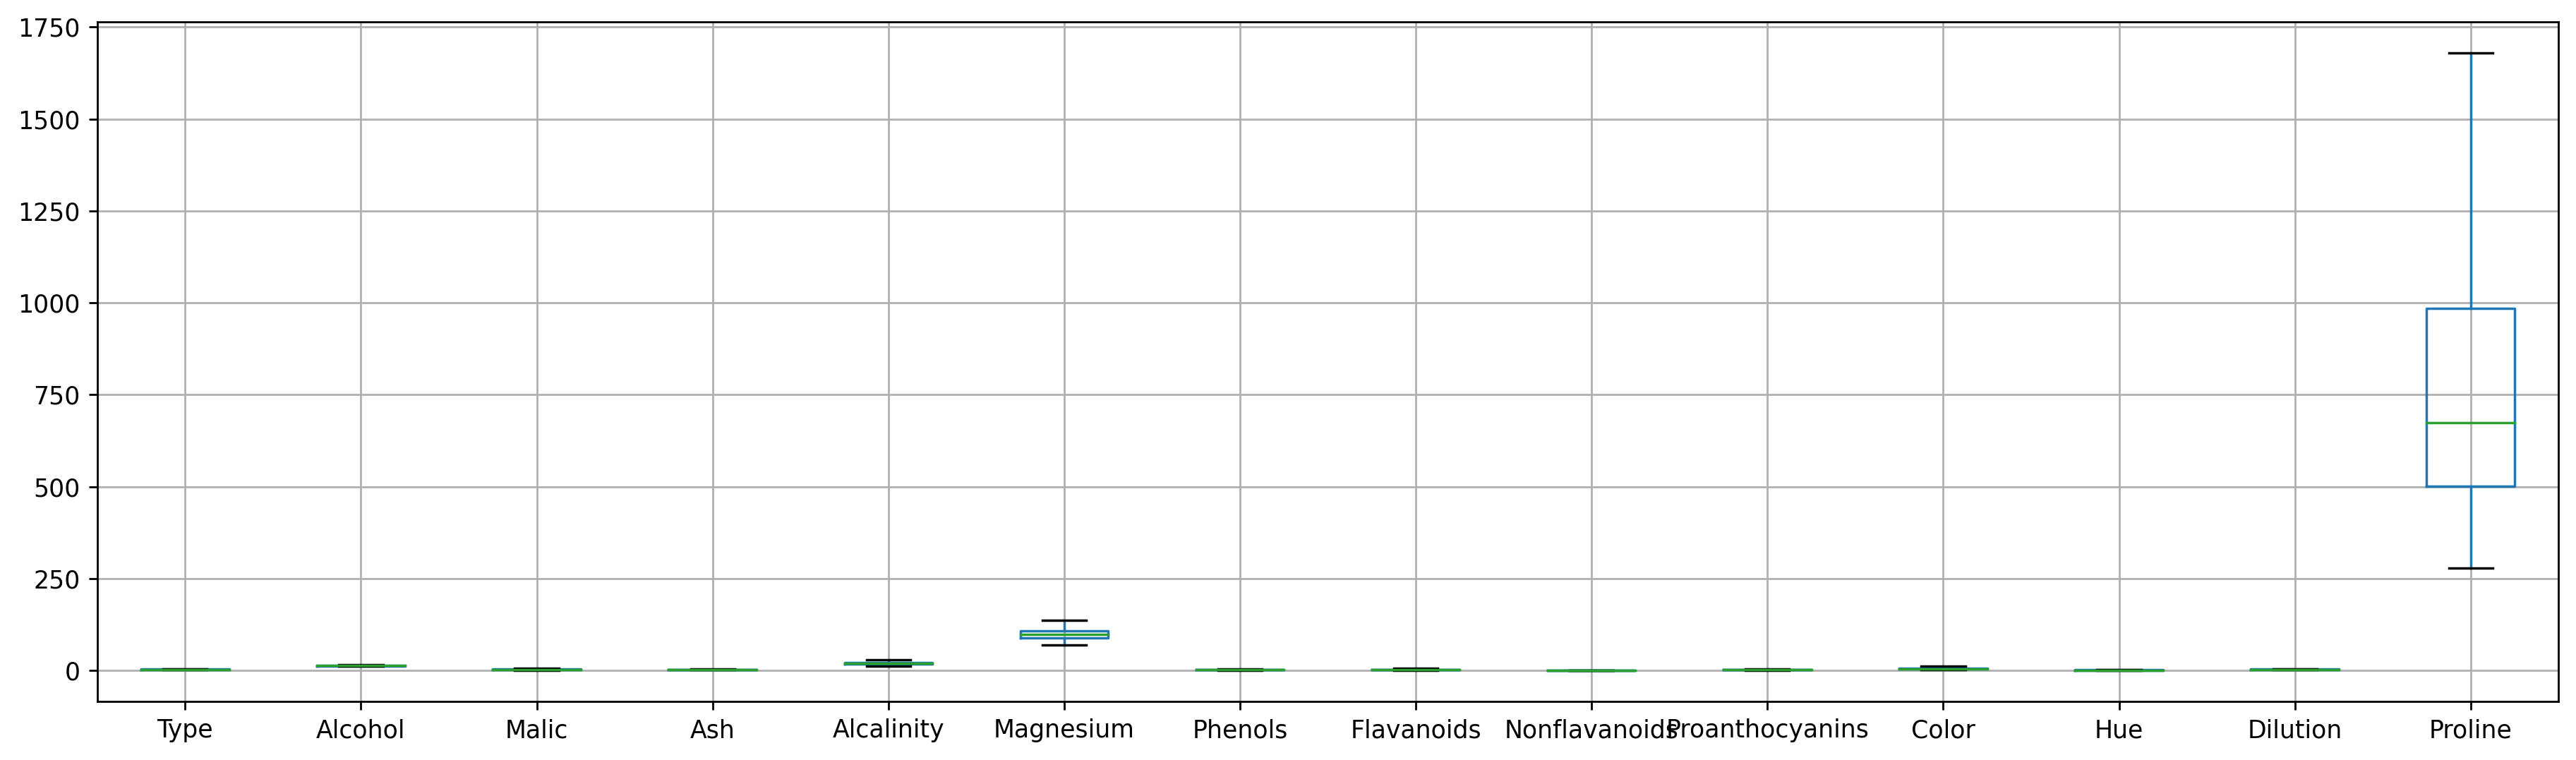

In [12]:
data.boxplot()

In [13]:
data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.330435    2.366721   19.478090   99.483146   
std      0.775035    0.811827    1.100173    0.263705    3.287757   13.414186   
min      1.000000   11.030000    0.740000    1.688750   10.750000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.302500    3.078750   27.950000  135.500000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.586067    5.038146   
std      0.625851    0.998859       0.124453         0.558153    2.260881   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.000000   10.670000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.956979    2.611685   746.893258  
std      0.227095    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.626250    4.000000  1680.000000

In [14]:
data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium          float64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [15]:
# there are two columns Type and Proline having float values but has dtype of int convering it to float 
data['Type'] = data['Type'].astype(float)
data['Proline'] = data['Proline'].astype(float)

In [16]:
data.dtypes

Type               float64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium          float64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline            float64
dtype: object

In [17]:
# cheking for null values 
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [18]:
#there are no null values present

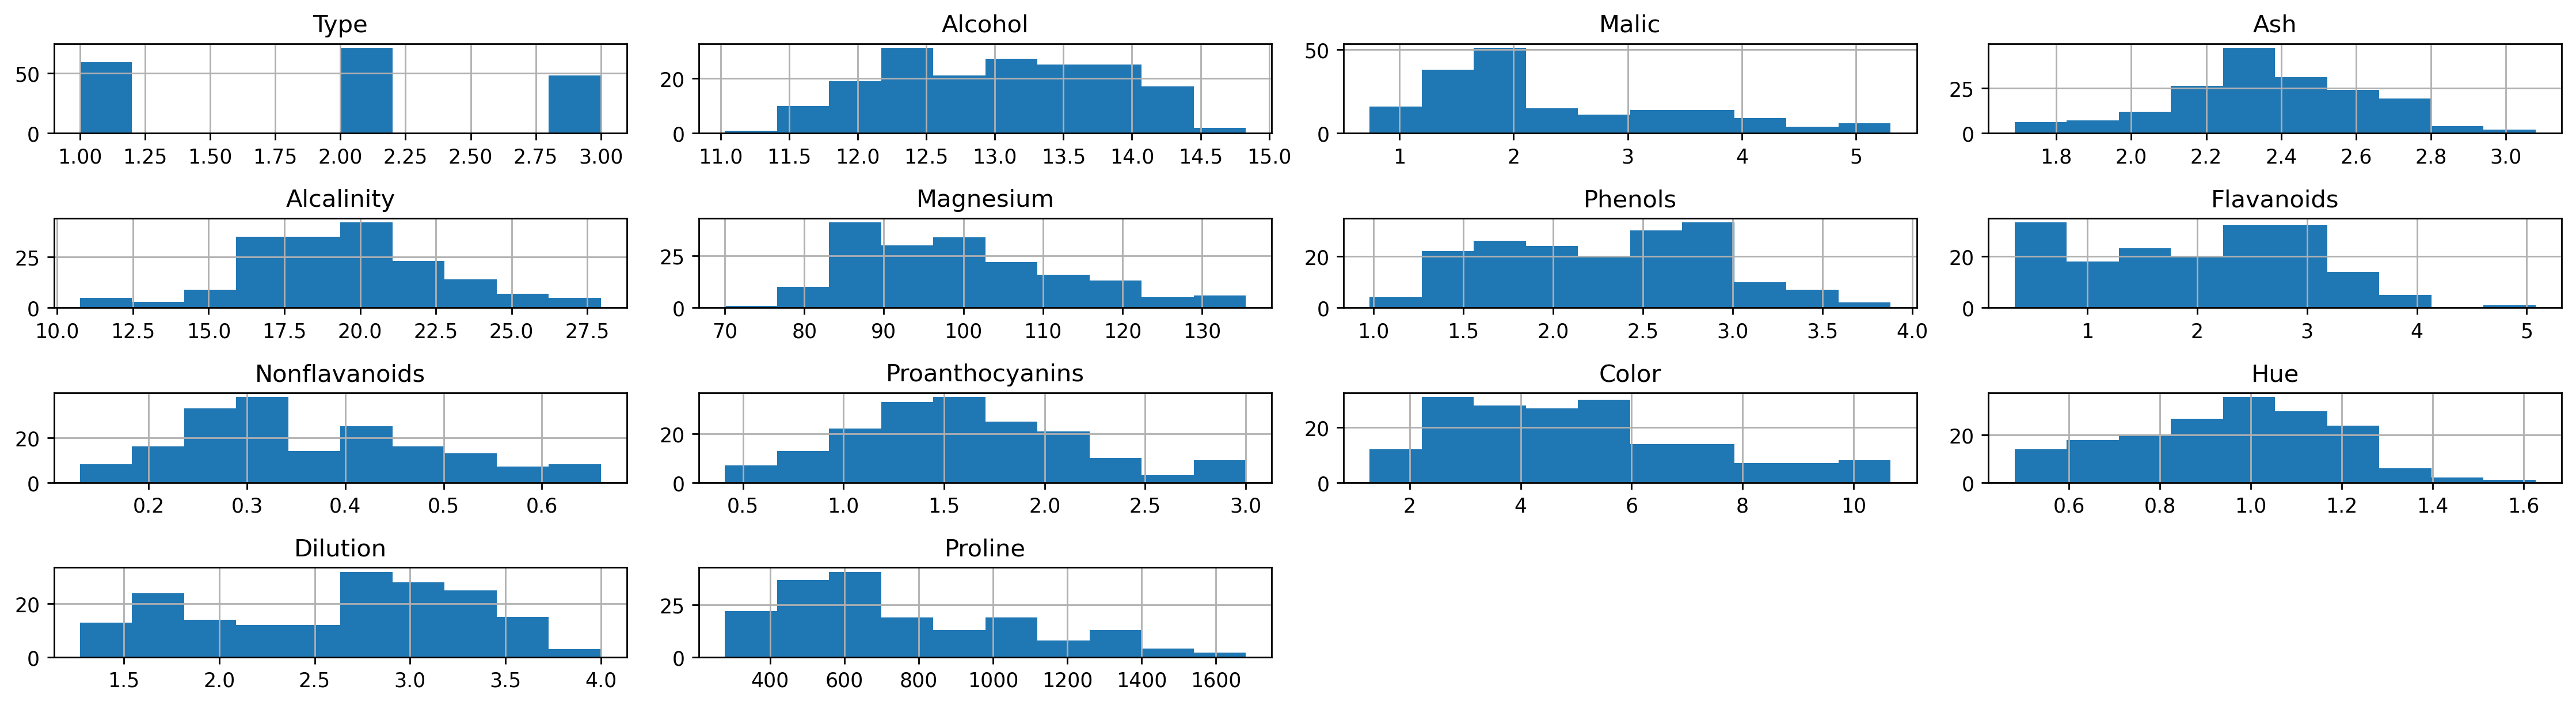

In [19]:
data.hist()
plt.tight_layout()

#### Dimensionality Reduction Using PCA

In [21]:
X = data.iloc[:, 1:]  
y = data.iloc[:, 0]
std = StandardScaler()
scaled_data = std.fit_transform(X)
scaled_data

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [22]:
pca = PCA()
pca.fit_transform(scaled_data)

array([[ 3.35814747, -1.52022185, -0.12637492, ..., -0.35905487,
         0.59934286, -0.1082988 ],
       [ 2.22921481,  0.33326137, -2.04283756, ..., -0.12060222,
         0.3722891 ,  0.00364028],
       [ 2.54005743, -1.03695315,  1.01884481, ..., -0.28999114,
         0.04671301,  0.04203325],
       ...,
       [-2.67116907, -2.86530059, -0.97512583, ...,  0.59573367,
         0.64695727, -0.02552532],
       [-2.37160346, -2.39380794, -0.56148477, ...,  0.35395561,
         0.34668062, -0.08347129],
       [-3.22745394, -2.80053456,  1.03090733, ..., -0.28617201,
        -0.13792419, -0.32602699]])

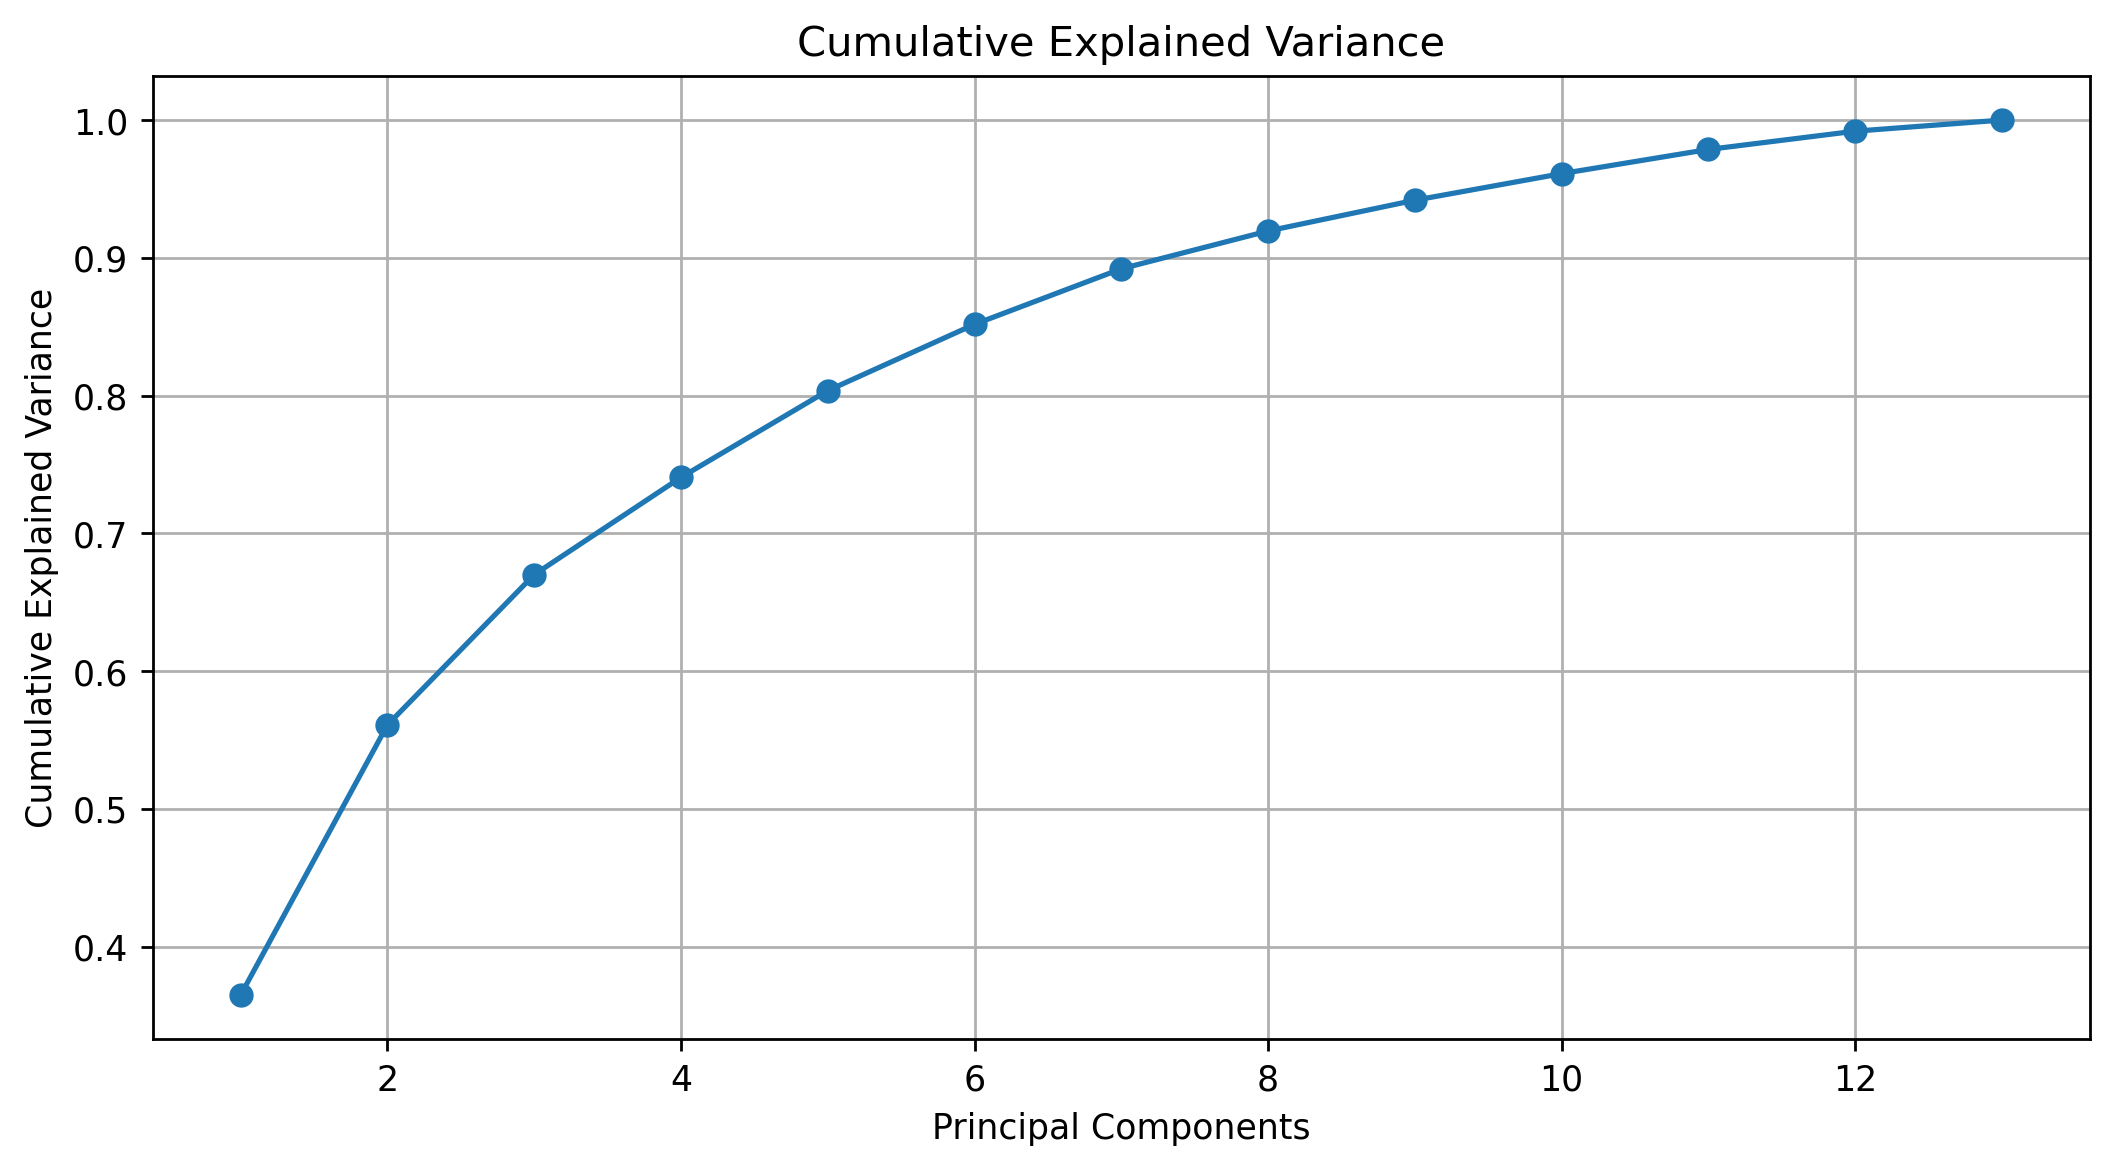

In [23]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [24]:
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_data)

In [25]:
pca.explained_variance_ # this explains amount of variance of each feature/column

array([4.7686445 , 2.56367336, 1.42646751])

In [26]:
# in percentage 
var = pca.explained_variance_ratio_
var

array([0.36475803, 0.19609775, 0.10911182])

In [27]:
# cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([36.48, 56.09, 67.  ])

In [28]:
pca.components_

array([[ 0.14638695, -0.24575619, -0.00357256, -0.24470276,  0.14087111,
         0.39339196,  0.42172715, -0.29683634,  0.3161246 , -0.08589806,
         0.29661931,  0.37445501,  0.28670932],
       [-0.47640599, -0.22659937, -0.31870602,  0.01442372, -0.32548413,
        -0.05970156,  0.00642568, -0.02645156, -0.03046924, -0.52512375,
         0.2734417 ,  0.16621634, -0.36136098],
       [-0.20200334,  0.08529267,  0.62917149,  0.60759082,  0.13469654,
         0.14999765,  0.14919738,  0.17278943,  0.1437554 , -0.1509434 ,
         0.088899  ,  0.16637909, -0.12289582]])

#### Clusterig with original data

In [30]:
from sklearn.cluster import KMeans
# Fit K-means to original data
kmeans_original = KMeans(n_clusters=3, random_state=0)  
clusters_original = kmeans_original.fit_predict(X)

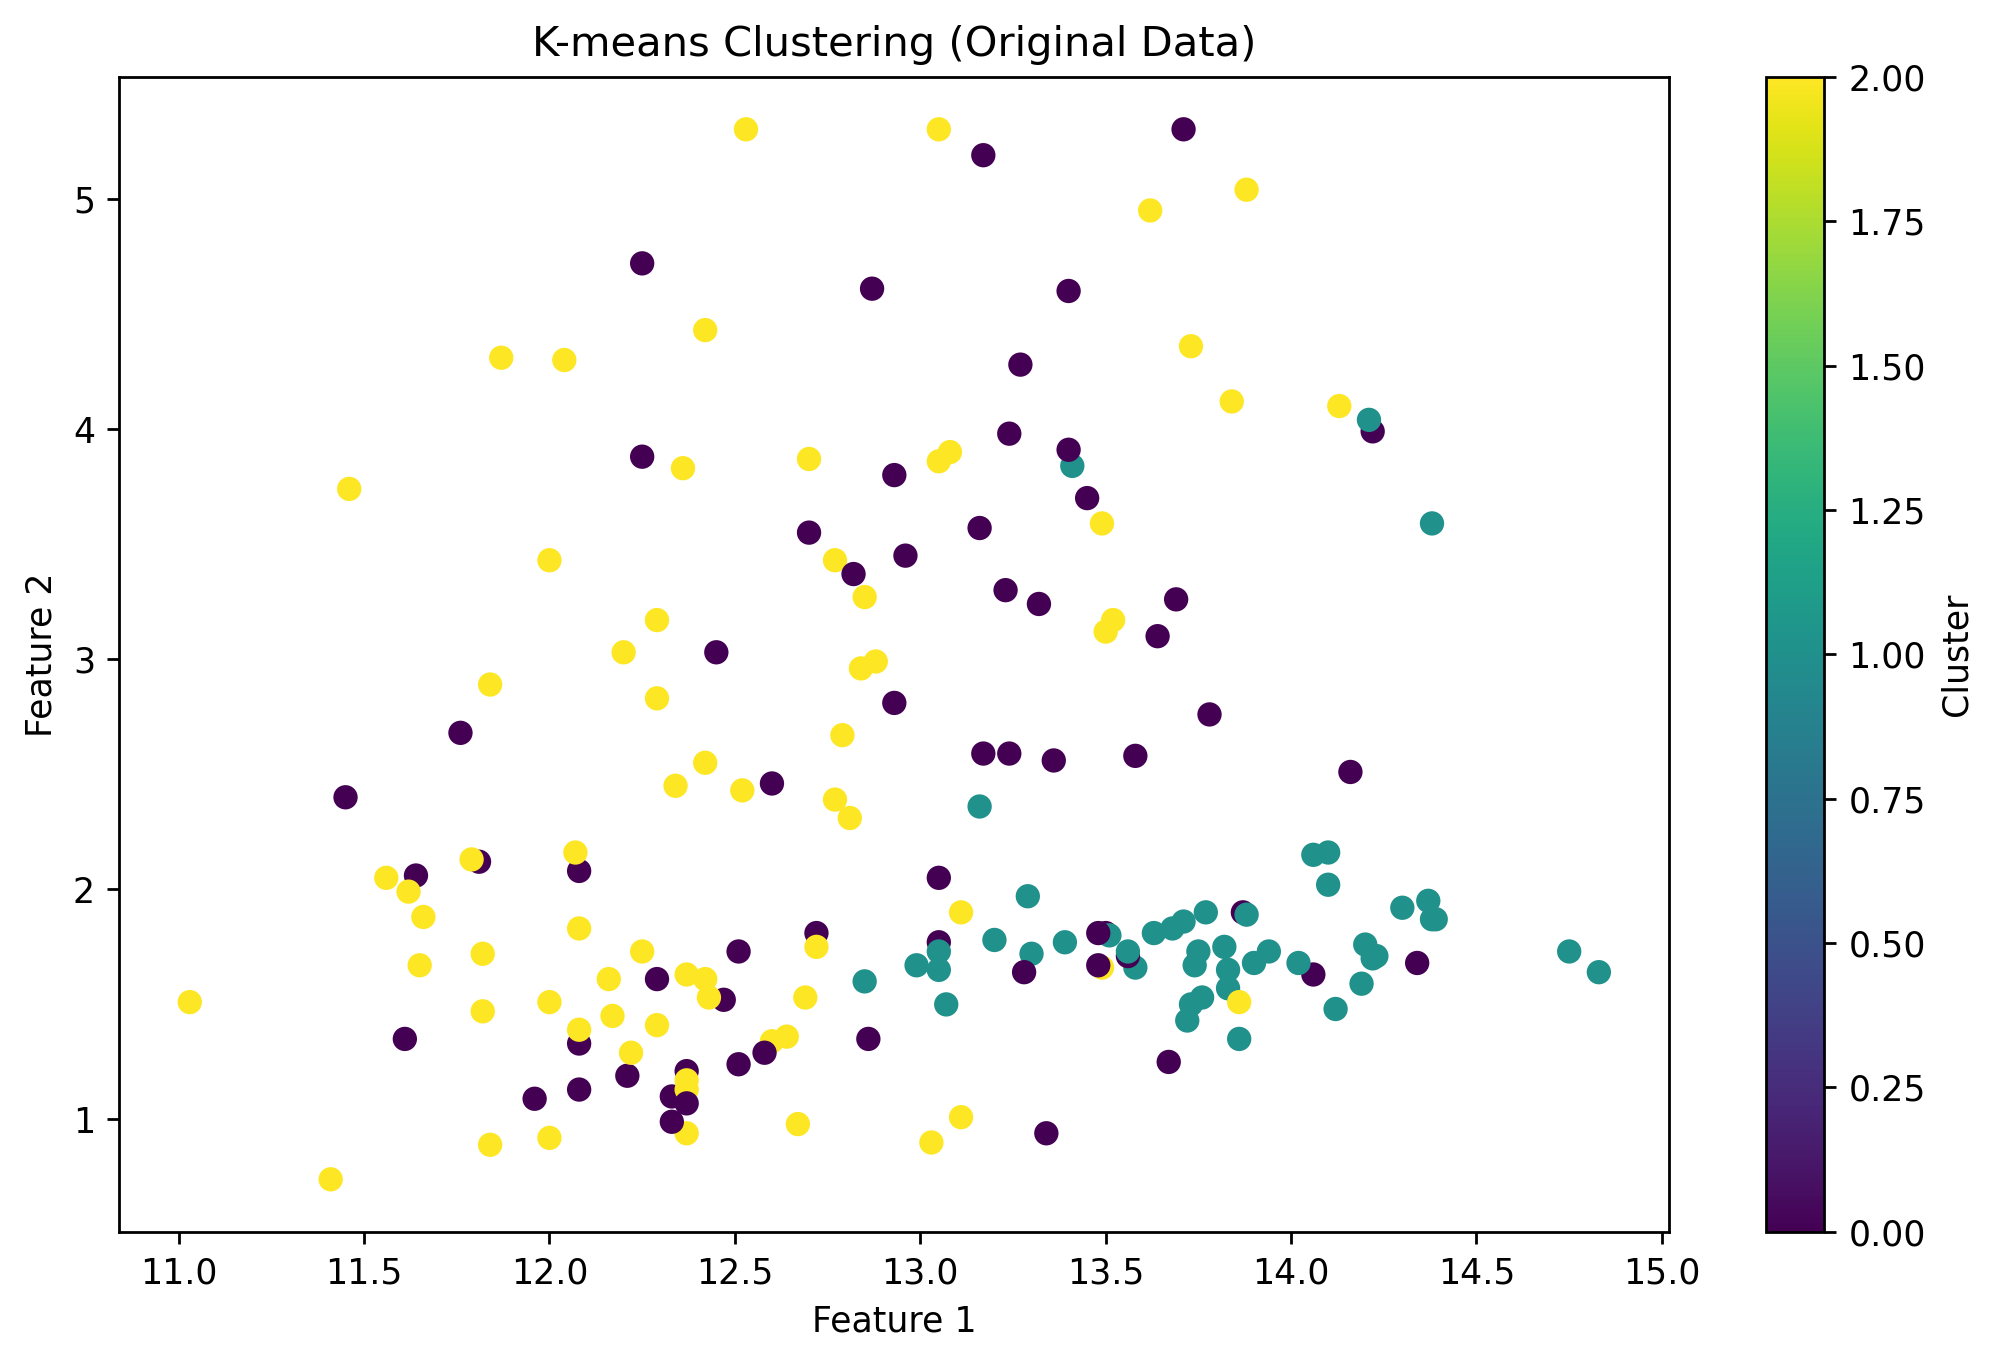

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters_original, cmap='viridis')  # Change indices for other features
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
silhouette_original = silhouette_score(X, clusters_original)
print(f'Silhouette Score (Original): {silhouette_original}')

Silhouette Score (Original): 0.571610031932576


#### Clustering With PCA Data

In [35]:
kmeans_pca = KMeans(n_clusters=3, random_state=0)
clusters_pca = kmeans_pca.fit_predict(X_pca)

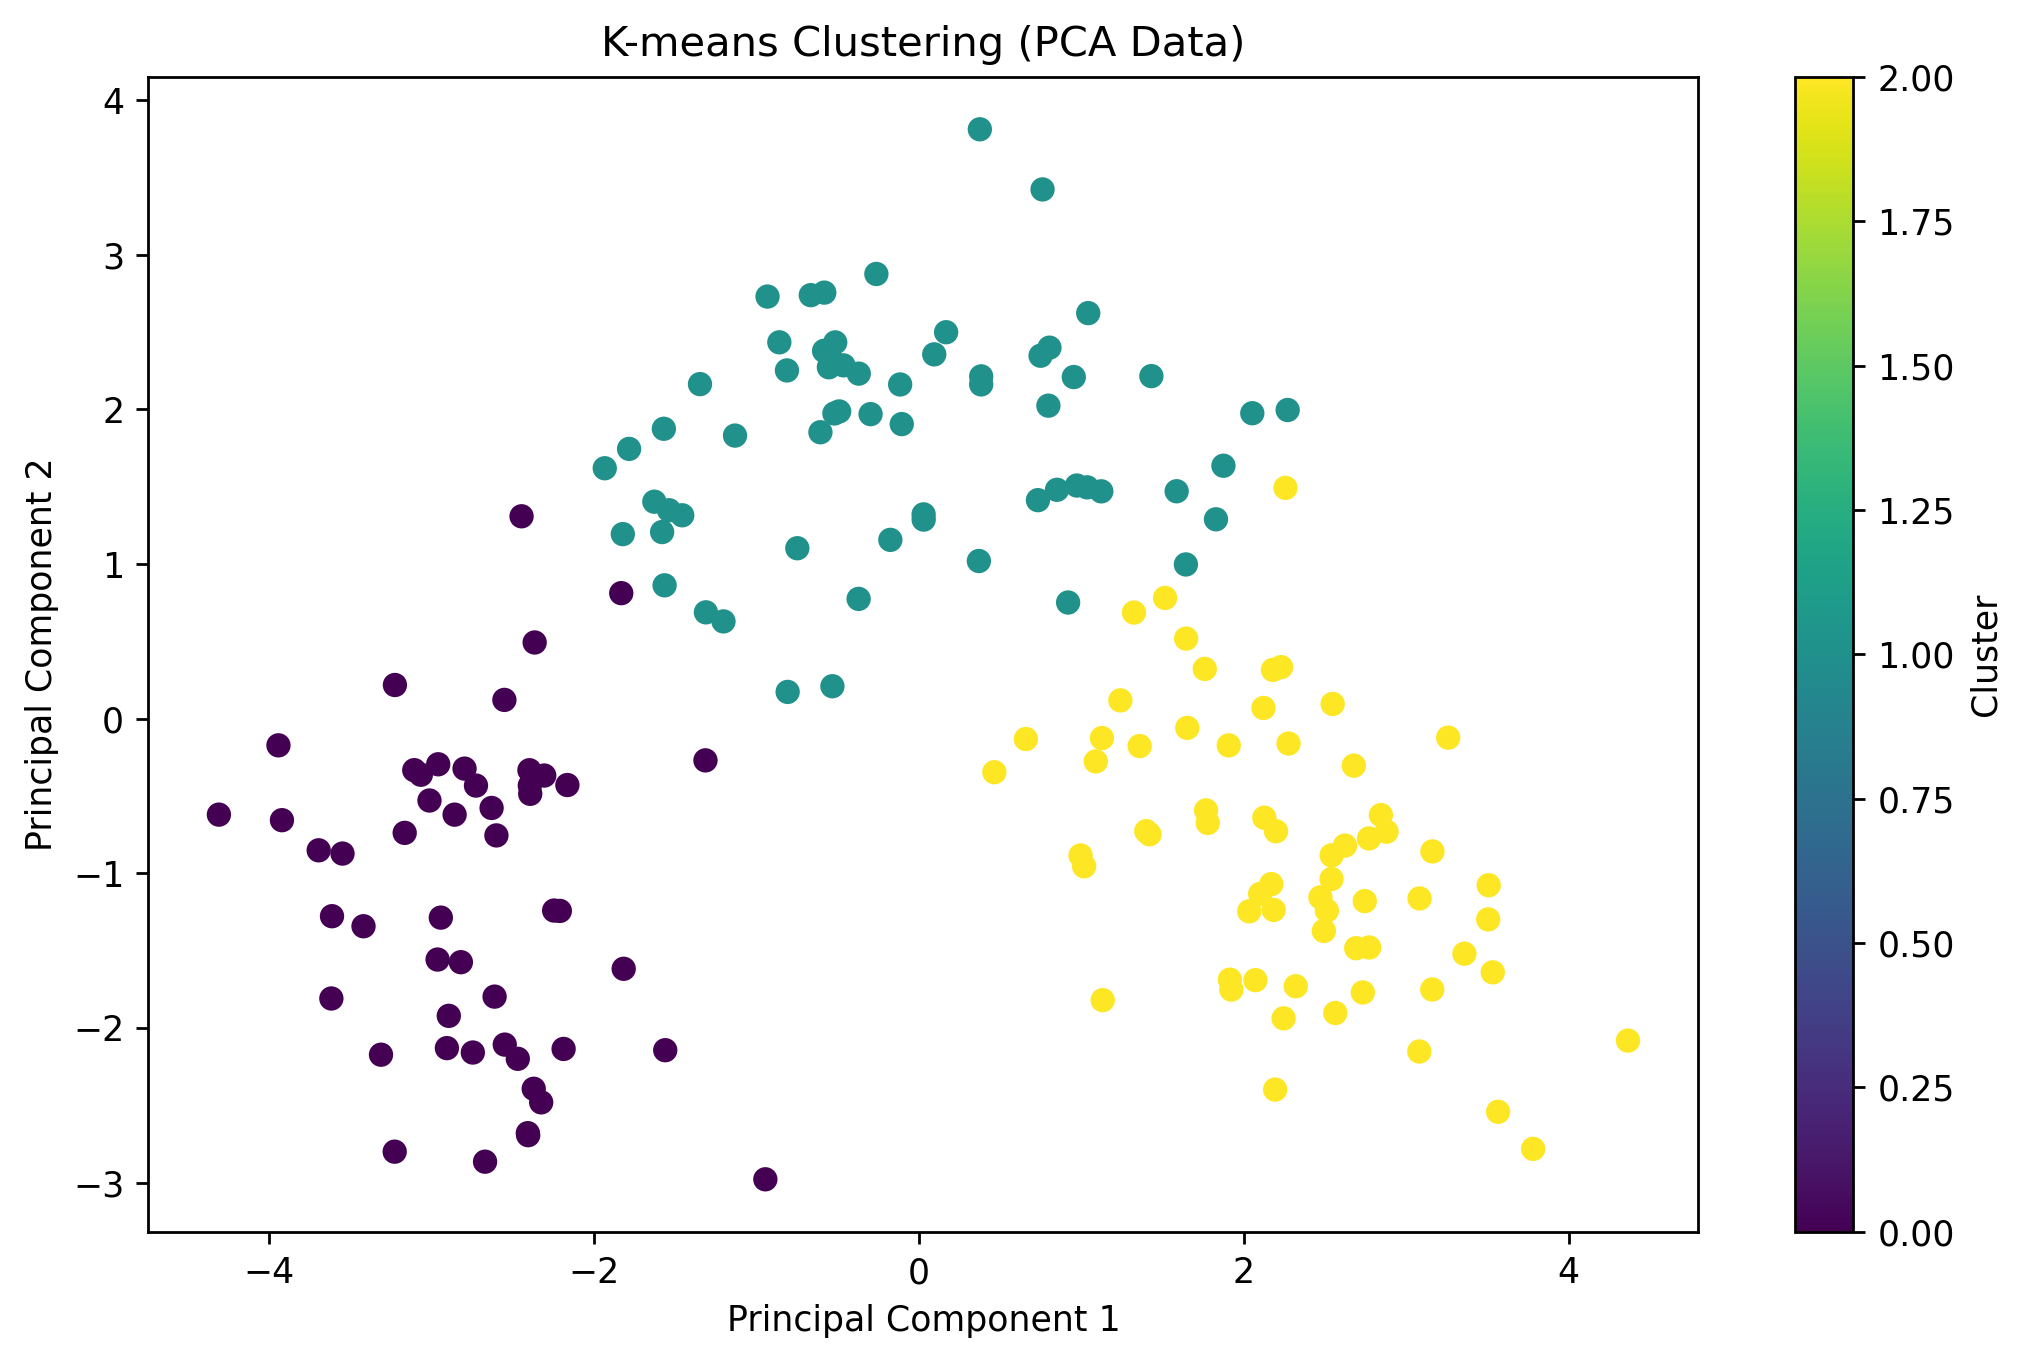

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title('K-means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f'Silhouette Score (PCA): {silhouette_pca}')

Silhouette Score (PCA): 0.4543748124452126


#### Comparison And Analysis

In [ ]:
'''
1.Comparison of Clustering Results:
   Clustering on the original dataset revealed a higher number of clusters with more overlap, while the PCA-transformed 
   data produced fewer, more distinct clusters due to reduced dimensions.
   
2.Similarities or Differences Observed
   Both datasets identified similar groups, but PCA resulted in clearer separation among clusters, reducing the ambiguity  
   present in the original dataset.
   
3.Impact of Dimensionality Reduction on Clustering Performance
   Dimensionality reduction via PCA enhanced cluster interpretability and reduced noise, leading to improved clustering 
   performance in terms of separation and cohesion.

4.Trade-offs Between Using PCA and Clustering on Original Data
   Using PCA simplifies analysis and reduces computation time but may discard important features, whereas clustering on the 
   original dataset retains all information, potentially revealing complex relationships at the cost of increased noise and 
   computational burden.
'''

#### Conclusion

In [ ]:
'''
The assignment highlighted the importance of clustering algorithm selection, revealing that PCA can enhance cluster 
separation and interpretability by reducing dimensionality. Key findings showed improved performance metrics, emphasizing 
that effective feature selection significantly influences clustering outcomes and informs practical applications in data-driven 
decision-making.
'''